## Representação de imagens matriciais

### Definição

Uma imagem digital é constituída por um conjunto de pixels, representado por uma matriz bidimensional ou tridimensional, de acordo com os tipos definidos a seguir.

### Tipos

Octave suporta quatro tipos de imagens:

- imagens em tons de cinza;
- imagens binárias;
- imagens RGB;
- imagens indexadas.

### Imagem grayscale

Uma imagem em tons de cinza (**grayscale**) é representada por uma matriz bidimensional **M x N**, em que cada elemento expressa a intensidade do pixel.

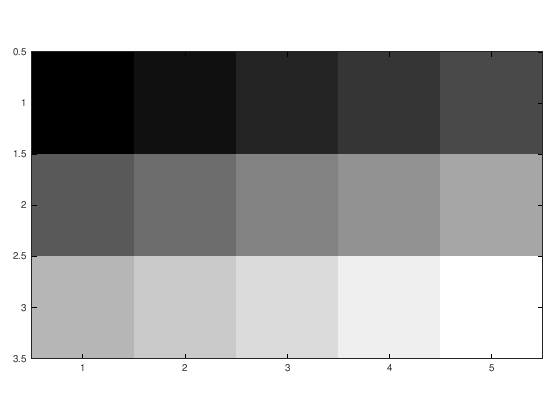

In [25]:
A = [0 2 4 6 8; 10 12 14 16 18; 20 22 24 26 28];
imagesc(A)
colormap(gray)
axis image % preserva a proporção da imagem

### Intermezzo

A transição de tons de cinza é baseada nos valores discretos na matriz **A**.

In [26]:
num_elementos = numel(A)

num_elementos = 15


A matriz **A** possui apenas 15 valores distintos (em uma matriz de 3x5), o que resulta em uma imagem com transições abruptas entre os níveis de cinza.

 Se aumentarmos a resolução da imagem, podemos obter uma transição mais suave entre os tons de cinza.

In [27]:
outsize = [256 512]; % [y x]
% criamos alguns vetores
x = linspace(0,1,outsize(2)); % linhas
y = linspace(0,1,outsize(1)).'; % colunas
% criamos a matriz no intervalo [0.2 0.8]
Z = 0.2 + 0.3*(x+y);

In [28]:
num_elementos = numel(Z)

num_elementos = 131072


A matriz **Z** tem 131,072 valores (em uma matriz de 256x512) distribuídos suavemente, resultando em uma imagem com transições muito mais suaves entre os níveis de cinza.

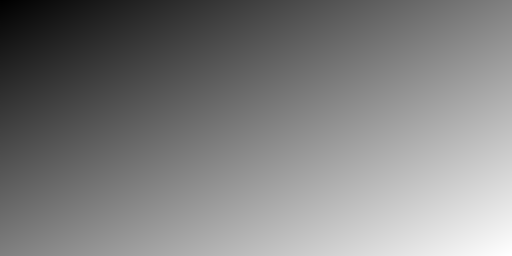

In [29]:
imagesc(Z) 
caxis([0 1]) % define a escala
colormap(gray(256)) % define o mapa de cores
axis image % preserva a proporção da imagem

### Imagem binária

A imagem **binária** é uma matriz bidimensional **M x N** da classe *logical*. Pode ser considerada um caso especial de imagens em tons de cinza, considerando apenas os dois valores extremos da escala: 0 ou preto, se falso; 1 ou branco, se verdadeiro.

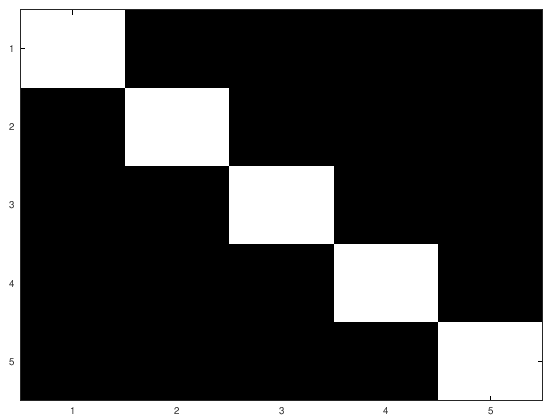

In [30]:
B = eye(5);
B = logical(B);
imagesc(B);
colormap gray

### Imagem truecolor

Uma imagem **RGB** (**truecolor**) é representada por uma matriz tridimensional **M x N x 3**. Cada pixel da imagem possui uma cor, resultante da combinação da intensidade de cada um dos canais: **red** (vermelho), **green** (verde) e **blue** (azul).

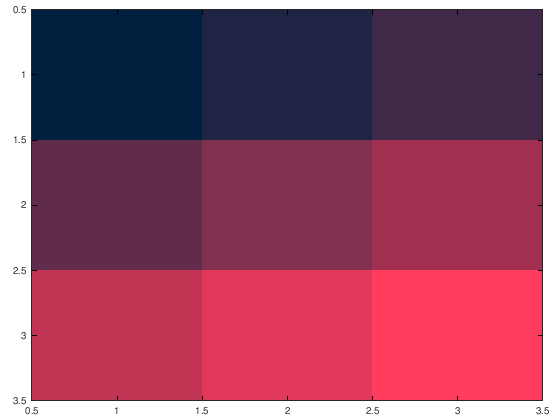

In [31]:
% Criação da matriz C
C = zeros(3,3,3);
C(:,:,1) = [.1 .2 .3 ; .4 .5 .6; .7 .8 .9]; % vermelho
C(:,:,2) = [.21 .22 .23; .24 .25 .26; .27 .28 .29]; % verde
C(:,:,3) = [.31 .32 .33; .34 .35 .36; .37 .38 .39]; % azul

% Exibir a imagem com imshow para imagens coloridas
imagesc(C);

### Imagem indexada

Uma imagem indexada consiste em uma matriz de inteiros **M x N** e um mapa de cores **C x 3**. Cada número inteiro corresponde a um índice no mapa de cores e cada linha no mapa de cores corresponde a uma cor **RGB**. O mapa de cores deve ser da classe *double* com valores entre 0 e 1.

D =

  0  1  2
  3  4  5
  6  7  8

map =

   0.1000   0.2100   0.3100
   0.2000   0.2200   0.3200
   0.3000   0.2300   0.3300
   0.4000   0.2400   0.3400
   0.5000   0.2500   0.3500
   0.6000   0.2600   0.3600
   0.7000   0.2700   0.3700
   0.8000   0.2800   0.3800
   0.9000   0.2900   0.3900



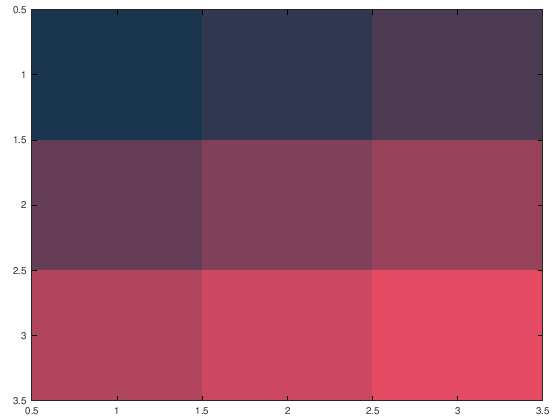

In [32]:
graphics_toolkit ("gnuplot");
[D, map] = rgb2ind (C); % Convertemos de RGB para índice de cores
imagesc(D);
colormap (map)
D
map

Por economia de espaço, omitimos a expressão numérica da matriz **Z** e do mapa de cores, no exemplo abaixo.

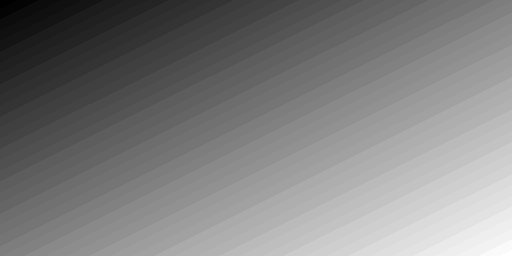

In [33]:
W = double(Z); % Garantimos que A esteja em formato de ponto flutuante
W = W / max(W(:)); % Normalizamos a imagem para o intervalo [0, 1]
%Z = A(1:3,2:4); % Fatiamos a matriz original para o formato 3x3
[D, map] = gray2ind(W);
imagesc(D);
colormap gray

### Classes

A intensidade do pixel, para imagens em tons de cinza e RGB, depende da classe da matriz. Isto é, a escala esperada dos dados da imagem é determinada pela sua classe numérica, definida de acordo com os intervalos nominais descritos na tabela abaixo:

|Tipo|Descrição|Intervalo| 
|-----|-------|------| 
|logical|Binário|0 ou 1| 
|uint8|Inteiro sem sinal de 8 bits|0-255|
|uint16|Inteiro sem sinal de 16 bits|0-65535|
|double|Real de dupla precisão 64 bits|0 e 1|


Para obtermos as classes das matrizes **A**, **B**, **C**, **D** e **Z**, definimos a seguinte função: 

In [34]:
function tipos = obterTipos(varargin)
    tipos = cell(size(varargin));
    for i = 1:nargin
        tipos{i} = class(varargin{i});
    end
end

obterTipos(A, B, C, D, Z)

ans =
{
  [1,1] = double
  [1,2] = logical
  [1,3] = double
  [1,4] = uint8
  [1,5] = double
}



### Mapas de cores

Um mapa de cores é uma matriz de valores que define as cores de objetos gráficos.<br>
Pode ter qualquer comprimento, mas deve apresentar três colunas de largura. Na definição de *Peter Kovisi*, pode ser entendido como uma linha ou curva desenhada através de um espaço de cores tridimensional.

### Default

**Viridis**, mapa de cores perceptualmente uniforme com luminância crescente monotonicamente e um arco suave e agradável em tons de azul, verde e amarelo, de acordo com a descrição de *Kenneth Moreland*, é o valor padrão adotado pelo Octave, caso não seja fornecido argumento para a função *colormap()*.

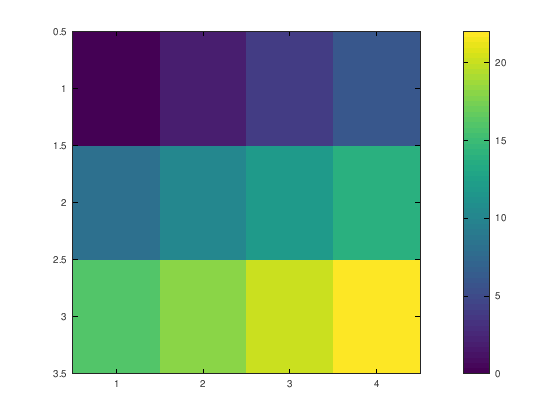

In [35]:
F = [0 2 4 6; 8 10 12 14; 16 18 20 22];
imagesc(F)
colorbar

### Exemplos de opções integradas

Octave disponibiliza diversos mapas de cores para escolha do usuário. Lembramos, no entanto, das advertências para que seja evitado o modelo *rainbow*, considerado perceptualmente não-uniforme, com transições enganosas, contra-indicado para pessoas com deficiência visual para cores, condição conhecida como *daltonismo*.

Exibimos a seguir alguns mapas de cores disponíveis no Octave.

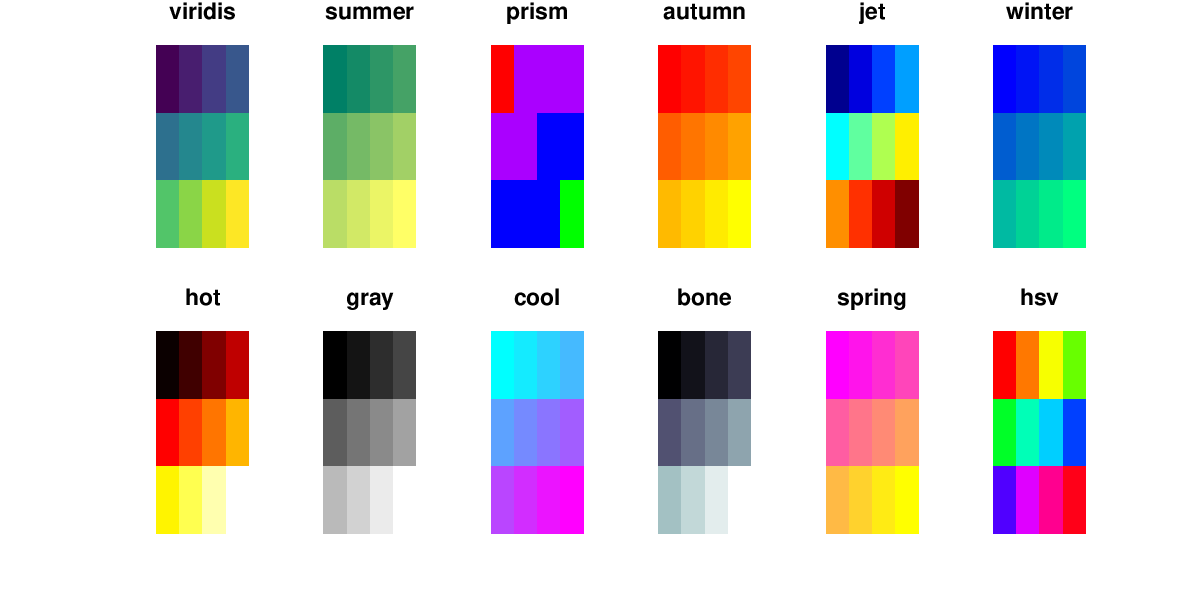

In [43]:
% Definimos a imagem
img = [0 2 4 6; 8 10 12 14; 16 18 20 22];


% Definimos os mapas de cores
colormaps = {'viridis', 'prism', 'jet', 'hot', 'cool', 'spring', 
                'summer', 'autumn', 'winter', 'gray', 'bone', 'hsv'};

% Criamos as imagens com a mesma escala, mas diferentes mapas de cores
figure;

for i = 1:12
    ax = subplot(2, 6, i);
    colormap(ax, colormaps{i});
    imagesc(img);
    axis off;
    title(colormaps{i});
end

% Ajustamos o tamanho da figura para caber todos os subplots
set(gcf, 'Position', [100, 100, 1200, 600]);


### ColorCET

*ColorCET* é um conjunto de mapas de cores perceptualmente uniformes, distribuído sob a licença *Creative Commons*, criado por *Peter Kovisi*, cuja versão para Octave pode ser baixada no endereço https://colorcet.com/download/index.html.

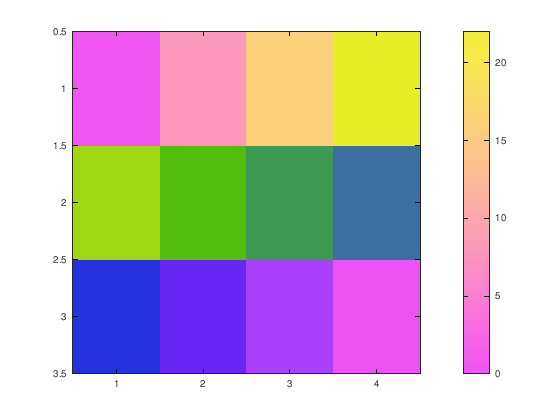

In [37]:
cm = colorcet('C2');
imagesc(F)
colorbar
colormap(cm)

### Transformações

Podemos realizar operações com as matrizes numéricas para produzir alterações nas imagens.

Temos a matriz original:

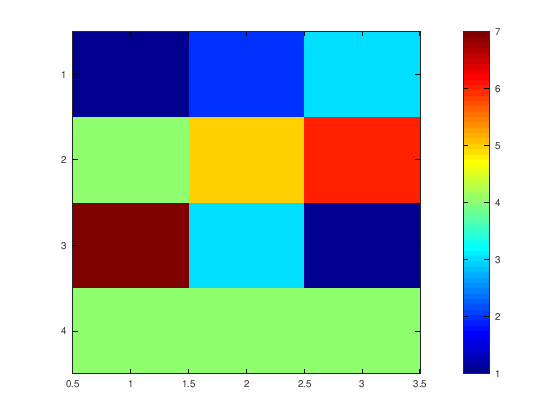

In [38]:
G = [1 2 3; 4 5 6; 7 3 1; 4 4 4];
imagesc(G)
colorbar
colormap jet

Realizamos uma transformação trigonométrica:

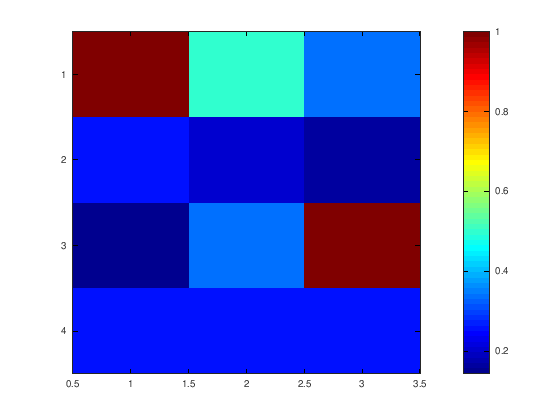

In [39]:
G = [1 2 3; 4 5 6; 7 3 1; 4 4 4];
G2 = G .^ cos(pi);
imagesc(G2)
colorbar
colormap jet

Em seguida efetuamos uma transformação geométrica:

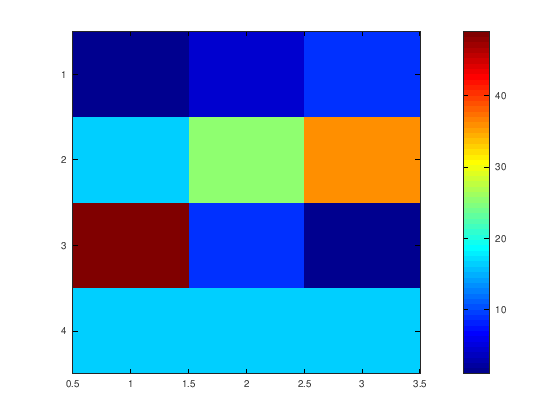

In [40]:
G3 = G .^ 2;
imagesc(G3)
colorbar
colormap jet

Finalizamos com uma transformação espacial:

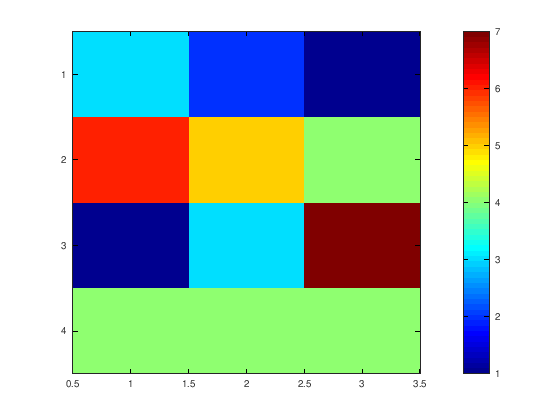

In [41]:
G4 = fliplr(G);
imagesc(G4)
colorbar
colormap jet

**Referências**:


Eaton, John W., Bateman, David , Hauberg, Søren, Wehbring, Rik (2024). GNU Octave version 9.2.0 manual: a high-level interactive language for numerical computations.

Kovesi, Peter (2015). Good Colour Maps: How to Design Them.
arXiv:1509.03700 [cs.GR].

Kovesi, Peter (2024). *ColorCET - Perceptually Uniform Colour Maps*. Acessado em 06/08/2024: https://colorcet.com/.

Moreland, Kenneth (2016). *Why We Use Bad Color Maps and What You Can Do About It.* In Proceedings of Human Vision and Electronic Imaging (HVEI), February 2016. DOI 10.2352/ISSN.2470-1173.2016.16.HVEI-133.<br>

Moreland, Kenneth (2016). *Color Map Advice for Scientific Visualization*. Acessado em 06/08/2024: https://www.kennethmoreland.com/color-advice/. 